# California ZIP Codes - Race and income

### Import Python tools and Jupyter configuration

In [1]:
%load_ext lab_black

In [2]:
# !pip install geopandas

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None

### Import race data

In [5]:
race_df = pd.read_csv("data/zips/ca-zip-codes-race.csv", dtype={"zip": "str"},)

In [6]:
race_df_slim = race_df[["zip", "med_age", "ave_hh_sz", "ave_fam_sz"]].copy()

In [7]:
race_df_slim.rename(
    columns={
        "med_age": "median_age",
        "ave_hh_sz": "household_size",
        "ave_fam_sz": "family_size",
    },
    inplace=True,
)

### Import income data

In [8]:
income_df = pd.read_csv("data/zips/ca_zips_income.csv", dtype={"zip": "str"},)

In [9]:
income_df.head()

,zip,name,avg_house_income,avg_net_worth,population
0,90001,Los Angeles,46931,82915,59907
1,90002,Los Angeles,46332,96786,53573
2,90003,Los Angeles,43020,66091,71967
3,90004,Los Angeles,65893,232653,63987
4,90005,Los Angeles,53191,105569,41844


---

### Merge them

In [10]:
zips = pd.merge(income_df, race_df_slim, on="zip")

In [11]:
zips_clean = zips[
    (zips["median_age"] > 0) & (zips["population"] > 0) & (zips["avg_house_income"] > 0)
]

In [12]:
zips_clean.to_csv("data/zips/ca-zip_demographics.csv", index=False)

---

### Geography

In [13]:
gdf = gpd.read_file("data/zips/zips.json")

In [14]:
gdf.columns

Index(['zip', 'geometry'], dtype='object')

<AxesSubplot:>

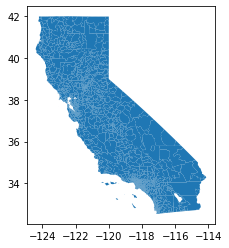

In [15]:
gdf.plot()

---

### Merge

In [16]:
merged_gdf = gdf.merge(zips, on="zip")

In [17]:
len(merged_gdf)

1654

<AxesSubplot:>

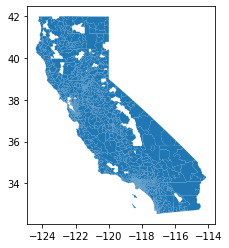

In [18]:
merged_gdf.plot()

In [19]:
merged_gdf.to_file(
    "data/geo/ca_zips_demos_geo.geojson", driver="GeoJSON",
)